In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **LINEAR REGRESSION with LASSO AND RIDGE**

In [ ]:
df = pd.read_csv("Student_Performance.csv")
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
  if df[col].dtypes == 'object':
    df[col] = le.fit_transform(df[col])

df

In [ ]:
sns.heatmap(df.corr(),annot = True)

In [ ]:
X = df.drop("Performance Index",axis = "columns")
y = df["Performance Index"]
X.head()

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_pred,y_test)
print("Mean absolute Error", mae)

mse = mean_squared_error(y_pred,y_test)
print("Mean Square Error", mse)

r2 = r2_score(y_pred,y_test)
print("R2 Score(Coefficient of Determination)", r2)

In [ ]:
#Not important
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, color='blue', label='Normal Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Performace')
plt.ylabel('Predicted Performance')
plt.legend()
plt.show()

In [ ]:
las = Lasso()
rid = Ridge()

las.fit(X_train,y_train)
rid.fit(X_train,y_train)

y_pred_las = las.predict(X_test)
y_pred_rid = rid.predict(X_test)

mae_las = mean_absolute_error(y_pred_las,y_test)
print("Mean absolute Error", mae_las)

mse_las = mean_squared_error(y_pred_las,y_test)
print("Mean Square Error", mse_las)

r2_las = r2_score(y_pred_las,y_test)
print("R2 Score(Coefficient of Determination)", r2_las)

mae_rid = mean_absolute_error(y_pred_rid,y_test)
print("Mean absolute Error", mae_rid)

mse_rid = mean_squared_error(y_pred_rid,y_test)
print("Mean Square Error", mse_rid)

r2_rid = r2_score(y_test,y_pred_rid)
print("R2 Score(Coefficient of Determination)", r2_rid)

# **Decision Trees with Overfitting Graph**

### DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df= pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

In [ ]:
X = df.drop(['Purchased'],axis=1)
y = df['Purchased']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
dtc = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=4,
                             min_samples_split=2, min_samples_leaf=1, max_features="auto")

dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

ac = accuracy_score(y_pred,y_test)
print("Accuracy Score : ", ac)

In [ ]:
train_accuracy = []
test_accuracy = []

max_depth_range = range(1, 20)

for depth in max_depth_range:
    dtc = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=depth,min_samples_split=2, min_samples_leaf=1, max_features="auto")
    dtc.fit(X_train, y_train)

    train_accuracy.append(dtc.score(X_train, y_train))
    test_accuracy.append(dtc.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_accuracy, label="Train Accuracy")
plt.plot(max_depth_range, test_accuracy, label="Test Accuracy")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Overfitting Graph")
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dtc,filled=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)



In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#**NAIVE BAYES**

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

In [ ]:
sns.heatmap(df.corr(),annot = True)

In [ ]:
sns.pairplot(df)

In [ ]:
X = df.drop("Purchased",axis = "columns")
y = df["Purchased"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
y_pred = GNB.predict(X_test)

accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
precision_score(y_test,y_pred)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)



In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression with Hyperparameter **Tuning**

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

In [ ]:
df.duplicated().sum()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

In [ ]:
X = df.drop("Purchased",axis = "columns")
y = df["Purchased"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

param_grid = {
    'C':[0.1,1,10],
    'penalty':['l1','l2'],
    'solver':['liblinear','lbfgs']
}

grid_search = GridSearchCV(lr,param_grid,cv=5)
grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
print(best_params)

best_model = grid_search.best_estimator_
print(best_model)

y_pred = best_model.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

#**SVM with hyperparameter tuning**



In [5]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.duplicated().sum()

33

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
X = df.drop("Purchased",axis = "columns")
y = df["Purchased"]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [11]:
from sklearn.svm import SVC
sv = SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

param_grid = {
    'C': [0.1,1,10],
    'kernel':['linear','rbf']
}

grid_search = GridSearchCV(sv,param_grid,cv=5)
grid_search.fit(X_train,y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy_score(y_test,y_pred)

#**Random Forest with feature importance**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [17]:
X = df.drop("Purchased",axis = "columns")
y = df["Purchased"]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
y_pred = rfc.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.9054054054054054

In [22]:
featimp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
selfeat = featimp[featimp>0.2].index

clf = RandomForestClassifier()
clf.fit(X_train[selfeat], y_train)
y_pred = clf.predict(X_test[selfeat])
clf.score(X_test[selfeat], y_test)

0.9054054054054054

<Axes: >

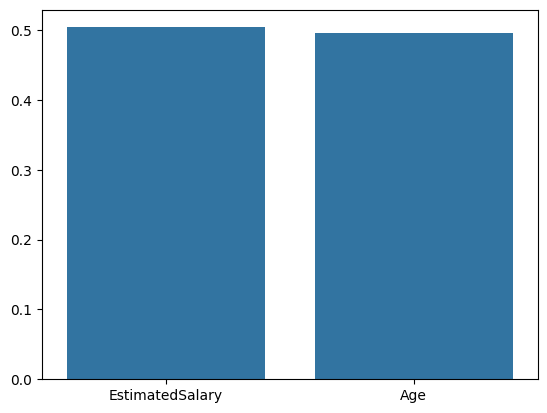

In [23]:
sns.barplot(featimp)

In [24]:
print('🍑')

🍑


#**Kmeans using pipeline**

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


In [38]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
df.shape

(150, 5)

In [31]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [33]:
df.duplicated().sum()

1

In [40]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['species']=le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy= 'mean')),
    ('scaler', StandardScaler()),
])

preprocessed_data = preprocessor.fit_transform(df)


In [42]:
inertia = []
silhouette_scores = []
K = range(2,11)

for k in K:
  kmeans = KMeans(n_clusters = k,random_state = 42)
  kmeans.fit(preprocessed_data)
  inertia.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(preprocessed_data,kmeans.labels_))

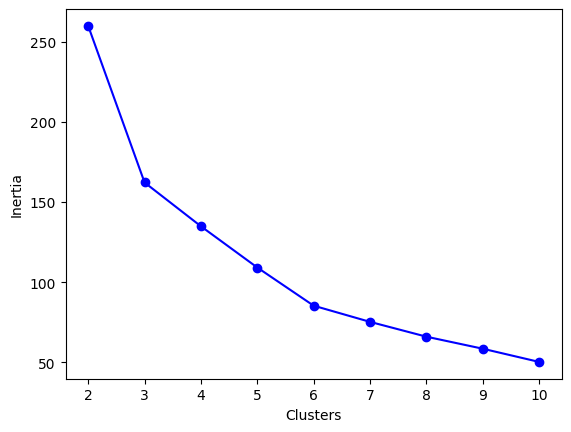

In [46]:
plt.plot(K,inertia,'bo-')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

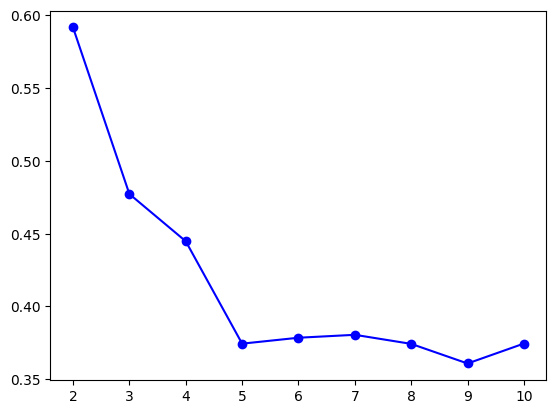

In [47]:
plt.plot(K,silhouette_scores,'bo-')
plt.show()

In [55]:
optimal_k = 5

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=optimal_k, random_state=42))
])

pipeline.fit(df)

clusters = pipeline.predict(df)
clusters

array([1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1,
       1, 4, 1, 4, 1, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [49]:
centroids = kmeans.cluster_centers_
centroids

array([[-3.90045145e-01, -1.57893058e+00,  2.79315355e-02,
        -8.37431420e-02,  1.54074396e-33],
       [-9.75689852e-01,  8.76501592e-01, -1.30504145e+00,
        -1.23395770e+00, -1.22474487e+00],
       [ 9.10105338e-01,  2.38893089e-01,  9.96423246e-01,
         1.32451229e+00,  1.22474487e+00],
       [-4.67361786e-02, -5.37564258e-01,  3.05352310e-01,
         1.82655326e-01,  3.08148791e-33],
       [ 8.03746874e-01,  2.14850315e-02,  4.97516944e-01,
         3.78223143e-01,  0.00000000e+00],
       [-5.74459981e-01,  1.95749886e+00, -1.27027277e+00,
        -1.20406322e+00, -1.22474487e+00],
       [ 2.12851559e+00,  1.55613014e+00,  1.50164482e+00,
         1.36107679e+00,  1.22474487e+00],
       [ 1.92656914e+00, -3.11021409e-01,  1.42586158e+00,
         1.03930922e+00,  1.22474487e+00],
       [ 2.50413599e-01, -7.88040263e-01,  7.85493240e-01,
         8.56486746e-01,  1.22474487e+00],
       [-1.42321761e+00, -7.44302878e-02, -1.33312185e+00,
        -1.32367131e+00

In [50]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 50.22483606751739


In [54]:
labels = kmeans.labels_
silhouette_avg = silhouette_score(preprocessed_data, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3745533691938688


###XGBOOST

In [65]:
import xgboost as xgb
from xgboost import XGBClassifier

In [60]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [61]:
X=df.iloc[:,:-1]
y=df['Purchased']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

In [68]:
# dt=DecisionTreeClassifier()
parameters={
    'learning_rate':[0.01,0.1,1,10],
    'n_estimators':[50,100,150],
    }

In [69]:
gridsearch=GridSearchCV(xg,parameters,cv=5)
gridsearch.fit(X_train,y_train)
best_param=gridsearch.best_params_
best_param
best_mod=gridsearch.best_estimator_
y_pred=best_mod.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

###ADABOOST

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [71]:
X:df.iloc[:,:-1]
y=df['Purchased']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
adb=AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred=adb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8875

In [80]:
nb=GaussianNB()
dt=DecisionTreeClassifier()
lr=LogisticRegression()
parameters={
    'learning_rate':[0.01,0.1,1,10],
    'n_estimators':[50,100,150],
    'base_estimator': [nb,dt,lr]
    }

In [81]:
gridsearch=GridSearchCV(adb,parameters,cv=5)
gridsearch.fit(X_train,y_train)
best_params= gridsearch.best_params_
best_params
best_model=gridsearch.best_estimator_
y_pred=best_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8375

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


In [84]:
roc_auc = auc(fpr, tpr)

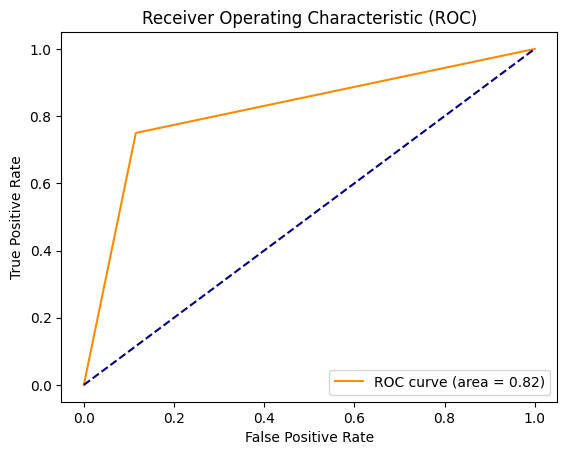

In [85]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Linear Regression from **Scratch**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("home.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data=pd.read_csv("food_truck_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


from matplotlib import pyplot as plt
_df_0['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Population', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [ ]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


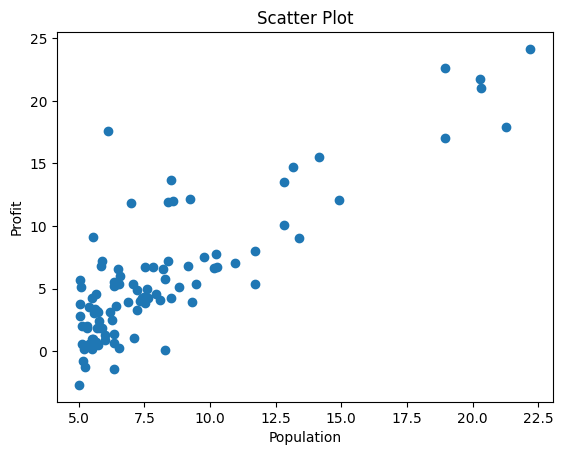

In [ ]:
plt.scatter(data['Population'],data['Profit'])
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Scatter Plot")
plt.show()

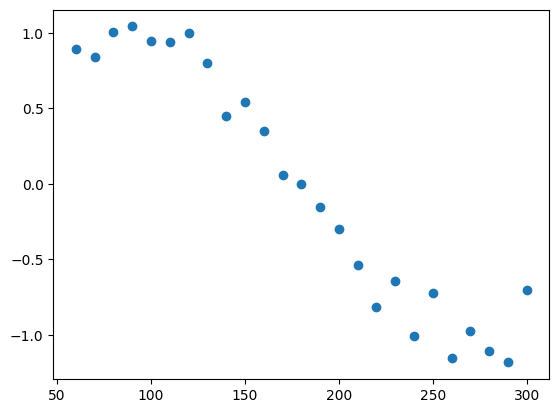

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(60, 301, 10)
y = np.sin(np.deg2rad(x)) + np.random.normal(0, 0.1, len(x))

plt.scatter(x, y)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

x = np.arange(60, 301, 10)
y = np.sin(np.deg2rad(x)) + np.random.normal(0, 0.1, len(x))

data = pd.read_csv("food_truck_data.txt")
x1 = data['Population'].values
y2 = data['Profit'].values

x = np.c_[np.ones(len(x)), x]

def cost_function(x, y, theta):
    m = len(y)
    h = np.dot(x, theta)
    J = (1/(2*m)) * np.sum(np.square(h-y))
    return J

def gradient_descent(x, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)
    for i in range(iterations):
        h = np.dot(x, theta)
        theta = theta - (alpha/m) * np.dot(x.T, (h-y))
        J_history[i] = cost_function(x, y, theta)
    return theta, J_history

theta = np.zeros(2)
alpha = 0.01
iterations = 1500

theta, J_history = gradient_descent(x, y, theta, alpha, iterations)

print('Theta:', theta)
print('Final cost:', J_history[-1])

Theta: [-3.63029144  1.16636235]
Final cost: 4.483388256587725


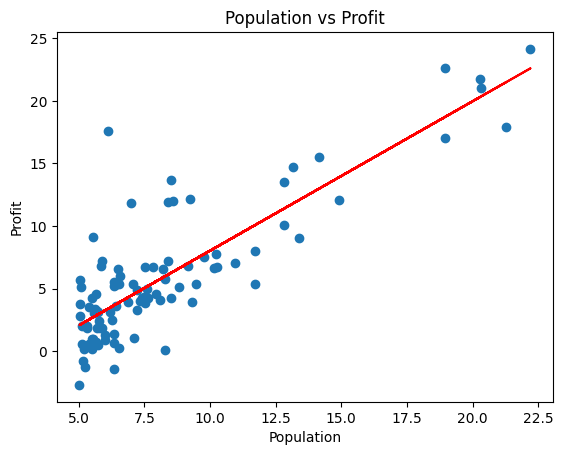

MSE: 8.953942751950358


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('food_truck_data.txt')
x = data['Population'].values.reshape(-1, 1)
y = data['Profit'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Population vs Profit")
plt.show()

mse = mean_squared_error(y, y_pred)
print('MSE:', mse)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

data = pd.read_csv('home.csv')
x = data.drop(['id', 'date', 'price'], axis=1).values
y = data['price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)


# train_size = int(0.8 * len(x))
# x_train, x_test = x[:train_size], x[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Ridge Regression MSE:', mse)

lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Lasso Regression MSE:', mse)

Ridge Regression MSE: 43232471296.83486
Lasso Regression MSE: 43231726817.10839


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.173e+14, tolerance: 2.315e+11
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.058e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Regression R^2 Score: 0.70
Ridge Regression R^2 Score: 0.70


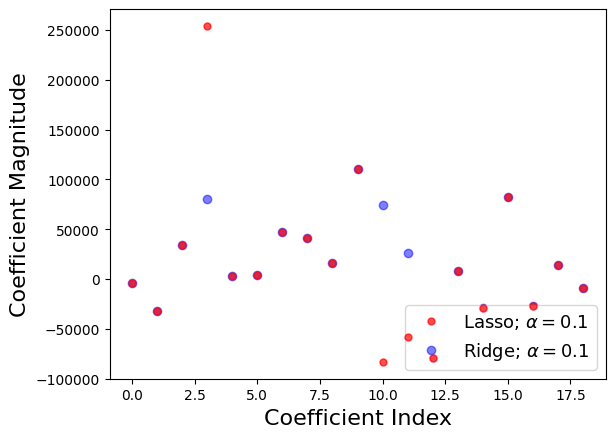

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('home.csv')

# Drop non-numeric columns
data = data.select_dtypes(include=['float64', 'int64'])

# Prepare the data
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha value
lasso.fit(X_train, y_train)

# Evaluate the model
lasso_score = lasso.score(X_test, y_test)
print("Lasso Regression R^2 Score: {:.2f}".format(lasso_score))

# Fit the Ridge regression model
ridge = Ridge(alpha=0.1)  # You can adjust the alpha value
ridge.fit(X_train, y_train)

# Evaluate the model
ridge_score = ridge.score(X_test, y_test)
print("Ridge Regression R^2 Score: {:.2f}".format(ridge_score))

# Visualize the coefficients
plt.plot(lasso.coef_, alpha=0.7, linestyle='none', marker='o', markersize=5, color='red', label=r'Lasso; $\alpha = 0.1$', zorder=7)  # Lasso
plt.plot(ridge.coef_, alpha=0.5, linestyle='none', marker='o', markersize=6, color='blue', label=r'Ridge; $\alpha = 0.1$')  # Ridge
plt.xlabel('Coefficient Index', fontsize=16)
plt.ylabel('Coefficient Magnitude', fontsize=16)
plt.legend(fontsize=13, loc=4)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

# Fit the Ridge regression model
ridge = Ridge(alpha=0.1)  # You can adjust the alpha value
ridge.fit(X_train, y_train)

# Evaluate the model
ridge_score = ridge.score(X_test, y_test)
print("Ridge Regression R^2 Score: {:.2f}".format(ridge_score))

Ridge Regression R^2 Score: 0.70


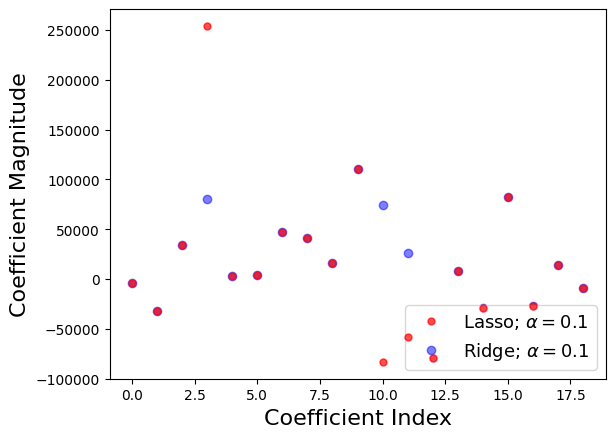

In [ ]:
import matplotlib.pyplot as plt

# Visualize the coefficients
plt.plot(lasso.coef_, alpha=0.7, linestyle='none', marker='o', markersize=5, color='red', label=r'Lasso; $\alpha = 0.1$', zorder=7)  # Lasso
plt.plot(ridge.coef_, alpha=0.5, linestyle='none', marker='o', markersize=6, color='blue', label=r'Ridge; $\alpha = 0.1$')  # Ridge
plt.xlabel('Coefficient Index', fontsize=16)
plt.ylabel('Coefficient Magnitude', fontsize=16)
plt.legend(fontsize=13, loc=4)
plt.show()

# Synthetic **Dataset**

In [86]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=5,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
X


array([[-0.04624849,  1.14474524, -0.98727948, ..., -4.81971741,
         3.82592482, -1.93325937],
       [-1.4130962 ,  1.18267569, -0.70834581, ..., -0.40325154,
         1.70065709, -0.41591316],
       [-0.15082202,  1.69363514, -2.43606808, ...,  2.08126461,
         0.19568136, -0.71540405],
       ...,
       [-3.56459982,  1.16242144, -1.03562078, ...,  2.8367531 ,
         0.28110773, -1.2412447 ],
       [-1.47439471, -2.43994879, -1.79468547, ..., -5.06823484,
         8.63269577, -2.30130251],
       [-1.07232447,  1.1358904 , -2.75367729, ...,  4.96756162,
         0.88076947,  1.22321955]])

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVC models with different kernels
svc_linear = SVC(kernel='linear', probability=True, random_state=42)
svc_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svc_rbf = SVC(kernel='rbf', probability=True, random_state=42)

# Train the models
svc_linear.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

# Make predictions and compute probabilities
y_pred_linear = svc_linear.predict(X_test)
y_pred_poly = svc_poly.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)

y_prob_linear = svc_linear.predict_proba(X_test)[:, 1]
y_prob_poly = svc_poly.predict_proba(X_test)[:, 1]
y_prob_rbf = svc_rbf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_prob_linear)
fpr_poly, tpr_poly, _ = roc_curve(y_test, y_prob_poly)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_prob_rbf)

roc_auc_linear = roc_auc_score(y_test, y_prob_linear)
roc_auc_poly = roc_auc_score(y_test, y_prob_poly)
roc_auc_rbf = roc_auc_score(y_test, y_prob_rbf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_linear, tpr_linear, color='blue', lw=2, label=f'Linear SVC (AUC = {roc_auc_linear:.2f})')
plt.plot(fpr_poly, tpr_poly, color='green', lw=2, label=f'Polynomial SVC (AUC = {roc_auc_poly:.2f})')
plt.plot(fpr_rbf, tpr_rbf, color='red', lw=2, label=f'RBF SVC (AUC = {roc_auc_rbf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
